# ONTARIO SCHOOLS WITH COVID-19 CASES ANALYSIS
## Peter Stangolis

#### [Data URL:](https://data.ontario.ca/dataset/b1fef838-8784-4338-8ef9-ae7cfd405b41/resource/7fbdbb48-d074-45d9-93cb-f7de58950418/download/schoolcovidsummary.csv) 

## Graphical Data Exploration

### Import the required libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.pyplot import figure

from pylab import rcParams
#rcParams['figure.figsize'] = 18, 6

import datetime
import seaborn as sns

In [4]:
# Graph Style Settings:

plt.style.use(['default', 'tableau-colorblind10'])


%matplotlib inline

### Import the cleaned data set 

In [5]:
df = pd.read_csv("ont_school_covid19_101.csv",
                parse_dates=True)

df.tail()

,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
50,2020-11-23,676,3,4828,60,51,9,0.0,1133.0,3870,2267,516,1087.0
51,2020-11-24,703,4,4828,270,223,47,0.0,1281.0,4170,2516,568,1086.0
52,2020-11-25,688,4,4828,162,138,24,0.0,1193.0,4269,2609,573,1087.0
53,2020-11-26,679,4,4828,88,70,18,0.0,1176.0,4349,2673,589,1087.0
54,2020-11-27,671,6,4828,122,99,23,0.0,1180.0,4470,2769,614,1087.0


## Initial Line Plot of Cumulative Cases from Sept - Nov 2020

Text(0.5, 0.98, '2020-09-11 - 2020-11-27')

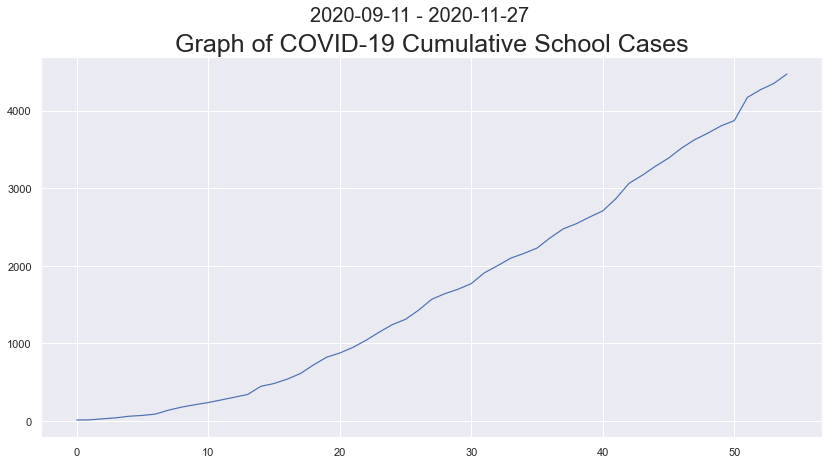

In [6]:
sns.set(rc={'figure.figsize':(14, 7)})

subtitle = f"{min(df['reported_date'])} - {max(df['reported_date'])}"

df['cumulative_school_related_cases'].plot(linewidth=1.2)
plt.title("Graph of COVID-19 Cumulative School Cases",
         fontsize=25)
plt.suptitle(subtitle,
            fontsize = 20)

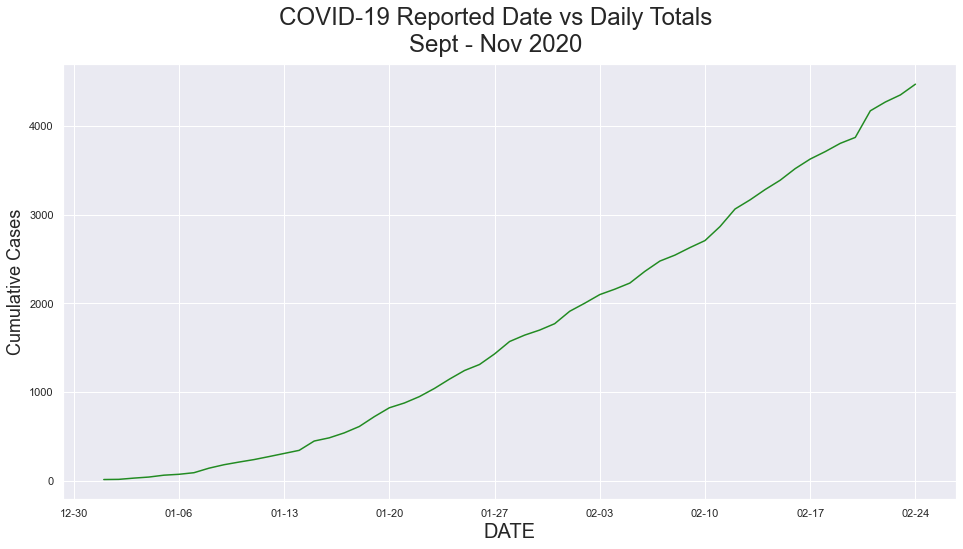

In [7]:
import matplotlib.dates as mdates


fig, ax =  plt.subplots(figsize=(16, 8))

ax.plot(df['reported_date'].values, df['cumulative_school_related_cases'],
       color="Forestgreen")

ax.set_ylabel("Cumulative Cases")
ax.set_xlabel("DATE")
#ax.set_xlim(["2020-09-01", "2020-11-30"])
fig.suptitle("COVID-19 Reported Date vs Daily Totals\nSept - Nov 2020", fontsize=24, fontweight='medium')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(18)


# Ensure a tick for each week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

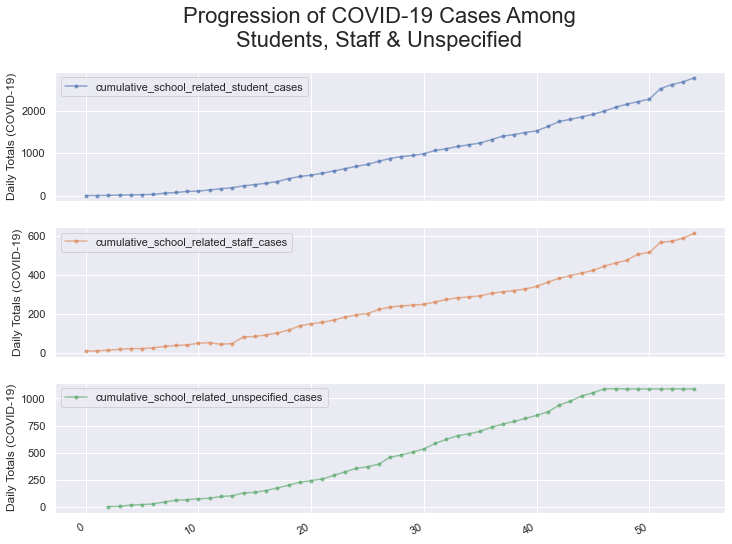

In [8]:


cols = ['cumulative_school_related_student_cases', 
        'cumulative_school_related_staff_cases', 
        'cumulative_school_related_unspecified_cases']

axes = df[cols].plot(marker='.', alpha = 0.6, linestyle = None, 
                     figsize=(12, 9), subplots = True)

for ax in axes:
    ax.set_ylabel("Daily Totals (COVID-19)")
    
plt.suptitle("Progression of COVID-19 Cases Among\nStudents, Staff & Unspecified",
            fontsize=22)
plt.show()


### The Number of Days Since First Reported Date

In [9]:
df['reported_date'] = pd.to_datetime(df['reported_date'])
df.dtypes

reported_date                                  datetime64[ns]
current_schools_w_cases                                 int64
current_schools_closed                                  int64
current_total_number_schools                            int64
new_total_school_related_cases                          int64
new_school_related_student_cases                        int64
new_school_related_staff_cases                          int64
new_school_related_unspecified_cases                  float64
recent_total_school_related_cases                     float64
cumulative_school_related_cases                         int64
cumulative_school_related_student_cases                 int64
cumulative_school_related_staff_cases                   int64
cumulative_school_related_unspecified_cases           float64
dtype: object

In [10]:
days_since_first_reported_cases = abs(min((df['reported_date']) - max(df['reported_date'])).days)


In [11]:
print(f"Days since first reported cases in schools: {days_since_first_reported_cases}")


Days since first reported cases in schools: 77


## New Daily COVID-19 Case Numbers for Students, Staff and Unspecified

<Figure size 1152x576 with 0 Axes>

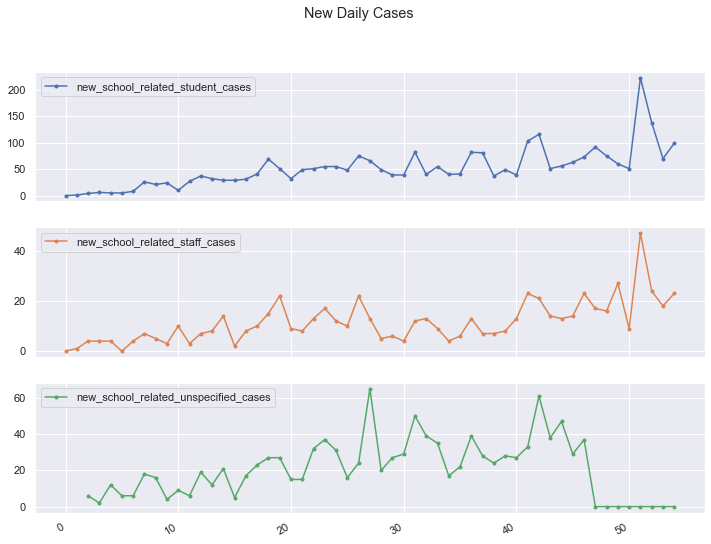

In [12]:
plt.figure(figsize=(16, 8))

cols = ['new_school_related_student_cases', 'new_school_related_staff_cases', 'new_school_related_unspecified_cases']
axes = df[cols].plot(marker='.', linestyle = None, figsize=(12, 9), subplots = True)
ax.set_ylabel("Daily Totals (COVID-19)")
plt.suptitle("New Daily Cases")
plt.show()

<Figure size 720x360 with 0 Axes>

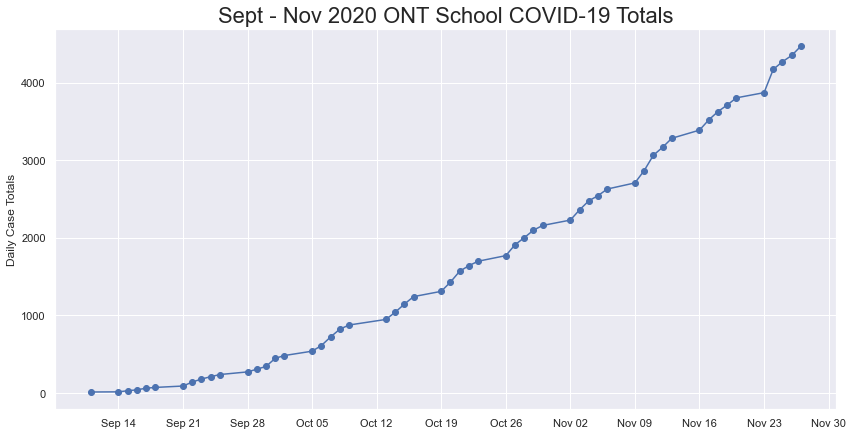

In [13]:
plt.figure(figsize=(10, 5))

fig, ax = plt.subplots()
ax.plot(df['reported_date'], df['cumulative_school_related_cases'], marker='o', linestyle='-')
ax.set_ylabel('Daily Case Totals')
ax.set_title('Sept - Nov 2020 ONT School COVID-19 Totals', size = 22)
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### Add week number to data frame

In [14]:
df["week_number"] = df['reported_date'].dt.weekofyear

C:\Users\P\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [15]:
# Group data frame by week number with a sum of cases per week

df_week_sum = df.groupby(['week_number'], as_index=False)[['new_total_school_related_cases']].sum()

### Plot of weekly case totals

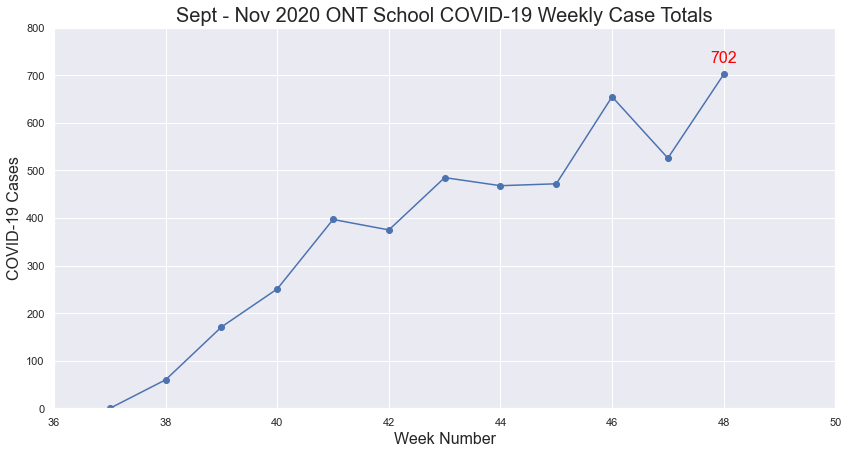

In [16]:
fig, ax = plt.subplots()

ax.plot(df_week_sum.week_number, df_week_sum.new_total_school_related_cases, marker='o', linestyle='-')
ax.set_ylabel('COVID-19 Cases', fontsize = 16)
ax.set_xlabel("Week Number", fontsize= 16)
ax.set_title('Sept - Nov 2020 ONT School COVID-19 Weekly Case Totals',
            fontsize=20)
ax.set
ax.set_ylim(0, 800)
ax.set_xlim(36, 50)

style = dict(size=16, color='red')
for x,y in zip(df_week_sum['week_number'].values, df_week_sum['new_total_school_related_cases'].values):
    label = "{:.0f}".format(y)
    if int(label) == max(df_week_sum["new_total_school_related_cases"]):
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,12), # distance from text to points (x,y)
                     ha='center',
                    **style) # horizontal alignment can be left, right or center

In [17]:
# Weekly mean COVID-19 case resample

# reset index to reported date
datetime_index = pd.DatetimeIndex(df.reported_date.values)
df2 = df.set_index(datetime_index)
df2.drop('reported_date', axis=1, inplace=True)

# resample dataframe with weekly totals
data_columns = ['new_total_school_related_cases']
weekly_mean = df2[data_columns].resample('W').mean()
weekly_mean.tail()

,new_total_school_related_cases
2020-11-01,93.6
2020-11-08,94.4
2020-11-15,131.0
2020-11-22,105.2
2020-11-29,140.4


## Plotting weekly mean COVID-19 cases  vs new daily case totals 

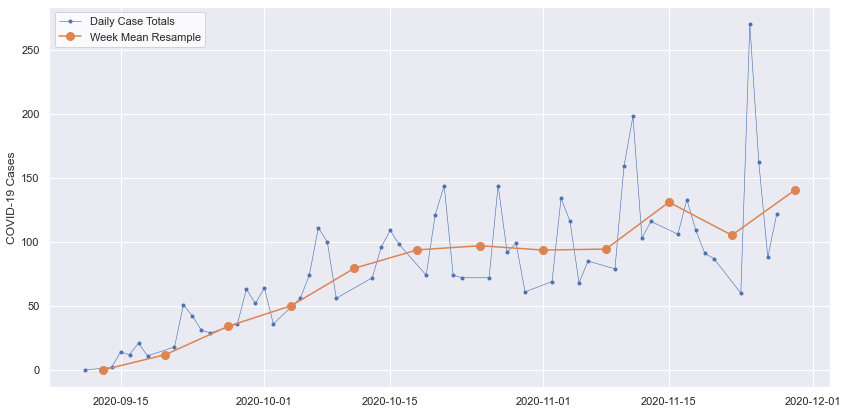

In [18]:
fig, ax = plt.subplots()

ax.plot(df2.loc[:, 'new_total_school_related_cases'],
       marker='.', linestyle='-', linewidth=0.6, label='Daily Case Totals')

ax.plot(weekly_mean.loc[:, 'new_total_school_related_cases'],
       marker='o', markersize=8, linestyle='-', label="Week Mean Resample")

ax.set_ylabel("COVID-19 Cases")

ax.legend(loc='upper left',facecolor='white' );

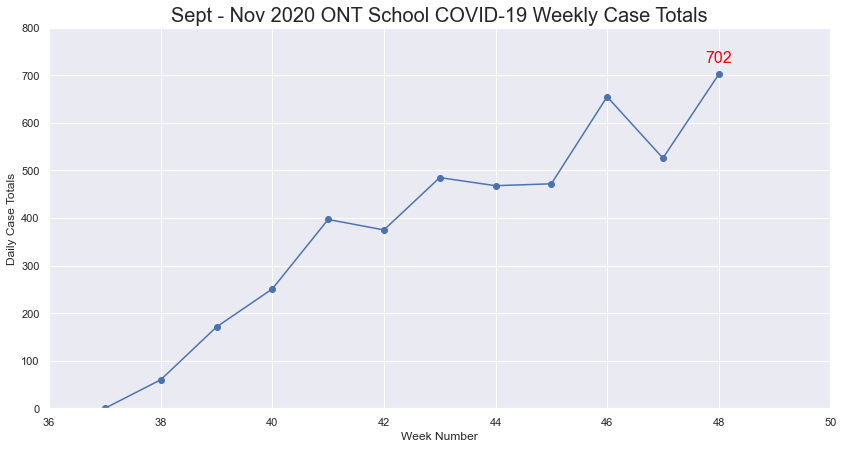

In [19]:
fig, ax = plt.subplots()
ax.plot(df_week_sum.week_number, df_week_sum.new_total_school_related_cases, marker='o', linestyle='-')
ax.set_ylabel('Daily Case Totals')
ax.set_xlabel("Week Number")
ax.set_title('Sept - Nov 2020 ONT School COVID-19 Weekly Case Totals',
            fontsize=20)
ax.set
ax.set_ylim(0, 800)
ax.set_xlim(36, 50)

style = dict(size=16, color='red')
for x,y in zip(df_week_sum['week_number'].values, df_week_sum['new_total_school_related_cases'].values):
    label = "{:.0f}".format(y)
    if int(label) == max(df_week_sum["new_total_school_related_cases"]):
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,12), # distance from text to points (x,y)
                     ha='center',
                    **style) # horizontal alignment can be left, right or center

## Plotting # of schools with COVID-19 Cases in Ontario

In [20]:
from datetime import datetime

ymax = max(df['current_schools_w_cases'].values)
print(f"Highest number of ONT school with COVID-19 cases: {ymax}")
y = df['current_schools_w_cases'].values
xpos = 0
for e, i in enumerate(y):
    if i == ymax:
        xpos = e
xmax = df.iloc[xpos, 0]
print(xmax)

Highest number of ONT school with COVID-19 cases: 703
2020-11-24 00:00:00


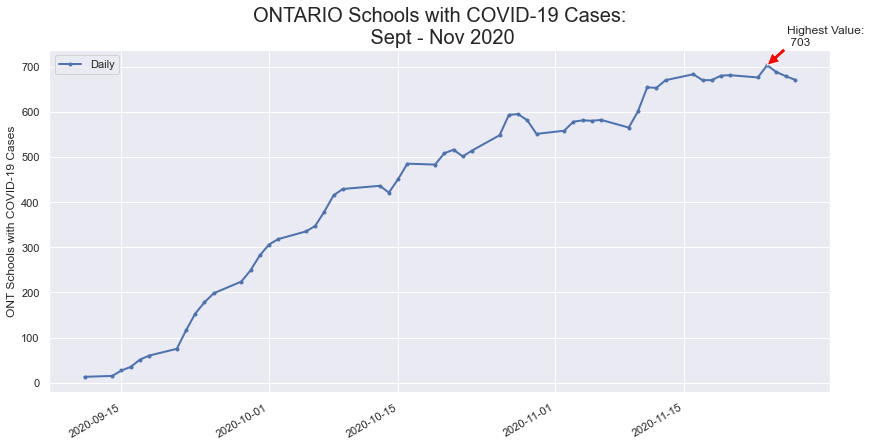

In [21]:
fig, ax = plt.subplots()

ax.plot(df2.loc[:, 'current_schools_w_cases'],
       marker='.', linestyle='-', linewidth=2.0, label='Daily')
#ax.plot(weekly_mean.loc[:, 'cumulative_school_related_cases'],
#       marker='o', markersize=8, linestyle='-', label="Week Mean Resample")
ax.set_ylabel("ONT Schools with COVID-19 Cases")
ax.set_title("ONTARIO Schools with COVID-19 Cases:\n Sept - Nov 2020", fontsize=20)

ax.annotate(f"Highest Value:\n {ymax}", xy = (xmax, ymax), xytext=(20, 20),
            textcoords='offset points',
            arrowprops=dict(facecolor='red')
           )

fig.autofmt_xdate()

ax.legend();